In [1]:
%pip install numpy
%pip install matplotlib
%pip install contourpy cycler fonttools importlib_resources kiwisolver matplotlib numpy packaging pillow pptree pyparsing python-dateutil scipy six zipp

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [17]:
from learner import LearnBrain
import numpy as np
# Word/part-of-speech acquisition experiments
def stroke_diff_severities_overlap(areas, stroke_severities, plasticity, simple_train_steps, recovery_steps):
  total_sv_vals = []
  for severity in stroke_severities:
    avgs = []
    stds = []
    words = [("CAT", "noun"), ("DOG", "noun"), ("JUMP", "verb"), ("RUN", "verb")]
    brain = LearnBrain(plasticity, LEX_k=100)
    total_results = []
    brain.train_simple(simple_train_steps)
    running = []
    for word in words:
      res = brain.test_word_nums_only(word[0])
      running.append(res[f"{word[1]}_overlap"] / len(res[f"{word[1]}_winners"]))
    
    total_results.append(np.mean(running))

    brain.stroke(percent_neurons_destroyed=severity, areas=areas)

    for _ in range(recovery_steps):
      brain.train_simple(1)
      running = []
      for word in words:
        res = brain.test_word_nums_only(word[0])
        running.append(res[f"{word[1]}_overlap"] / len(res[f"{word[1]}_winners"]))
      total_results.append(np.mean(running))
    total_sv_vals.append(total_results)
  return total_sv_vals
  

In [151]:
import matplotlib.pyplot as plt 
areas = ["NOUN", "VERB"]
stroke_severities = [0.01, 0.1, 0.5, 0.75, 0.90, 0.95, 0.97, 0.99, 0.999]
plasticity = 0.05 
simple_train_steps = 30
recovery_steps = 30
total_vals_overlaps_normal = stroke_diff_severities_overlap(areas, stroke_severities, plasticity, simple_train_steps, recovery_steps)

Round 0
Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
Round 8
Round 9
Round 10
Round 11
Round 12
Round 13
Round 14
Round 15
Round 16
Round 17
Round 18
Round 19
Round 20
Round 21
Round 22
Round 23
Round 24
Round 25
Round 26
Round 27
Round 28
Round 29
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
Round 8
Round 9
Round 10
Round 11
Round 12
Round 13
Round 14
Round 15
Round 16
Round 17
Round 18
Round 19
Round 20
Round 21
Round 22
Round 23
Round 24
Round 25
Round 26
Round 27
Round 28
Round 29
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0


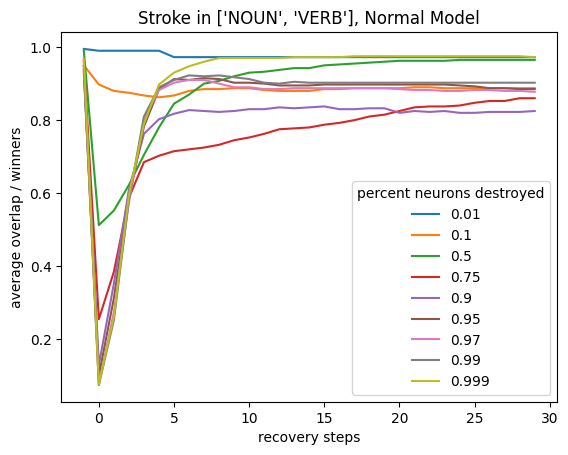

In [152]:
scaled_xvals = [i-1 for i in range(len(total_vals_overlaps_normal[0]))]
for i in range(len(total_vals_overlaps_normal)):
  plt.plot(scaled_xvals , total_vals_overlaps_normal[i], label=f"{stroke_severities[i]}")
  plt.title(f"Stroke in {areas}, Normal Model")
  plt.ylabel("average overlap / winners")
  plt.xlabel("recovery steps")
plt.legend(title="percent neurons destroyed")
plt.show()

In [27]:
from learner import LearnBrain
import numpy as np
# Word/part-of-speech acquisition experiments
def stroke_diff_severities_overlap_pre_stroke(areas, stroke_severities, plasticity, simple_train_steps, recovery_steps, pre_stroke_percentage):
  total_sv_vals = []
  for severity in stroke_severities:
    words = [("CAT", "noun"), ("DOG", "noun"), ("JUMP", "verb"), ("RUN", "verb")]
    brain = LearnBrain(plasticity, LEX_k=100)
    total_results = []
    brain.stroke(percent_neurons_destroyed=pre_stroke_percentage, areas=["PHON"])
    brain.train_simple(simple_train_steps)
    running = []
    for word in words:
      res = brain.test_word_nums_only(word[0])
      running.append(res[f"{word[1]}_overlap"] / len(res[f"{word[1]}_winners"]))
    
    total_results.append(np.mean(running))

    brain.stroke(percent_neurons_destroyed=severity, areas=areas)

    for _ in range(recovery_steps):
      brain.train_simple(1)
      running = []
      for word in words:
        res = brain.test_word_nums_only(word[0])
        running.append(res[f"{word[1]}_overlap"] / len(res[f"{word[1]}_winners"]))
      total_results.append(np.mean(running))
    total_sv_vals.append(total_results)
  return total_sv_vals
  

In [82]:
import matplotlib.pyplot as plt 
areas = ["NOUN", "VERB", "MOTOR", "VISUAL"]
stroke_severities = [0.01, 0.1, 0.5, 0.75, 0.90, 0.95, 0.97, 0.99, 0.999]
plasticity = 0.05 
simple_train_steps = 30
recovery_steps = 30
pre_stroke_percentage = 0.96
total_vals = stroke_diff_severities_overlap_pre_stroke(areas, stroke_severities, plasticity, simple_train_steps, recovery_steps, pre_stroke_percentage)
scaled_xvals = [i-1 for i in range(len(total_vals[0]))]
for i in range(len(total_vals)):
  plt.plot(scaled_xvals , total_vals[i], label=f"{stroke_severities[i]}")
  plt.title(f"Stroke in {areas}")
  plt.ylabel("average overlap / winners")
  plt.xlabel("recovery steps")
plt.legend(title="percent neurons destroyed")
plt.show()

Round 0


IndexError: index 3200 is out of bounds for axis 0 with size 400

In [156]:
import matplotlib.pyplot as plt 
areas = ["NOUN", "VERB"]
stroke_severities = [0.01, 0.1, 0.5, 0.75, 0.90, 0.95, 0.97, 0.99, 0.999]
plasticity = 0.05 
simple_train_steps = 30
recovery_steps = 30
pre_stroke_percentage = 0.7
total_vals_pre_stroke_overlaps = stroke_diff_severities_overlap_pre_stroke(areas, stroke_severities, plasticity, simple_train_steps, recovery_steps, pre_stroke_percentage)

Round 0
Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
Round 8
Round 9
Round 10
Round 11
Round 12
Round 13
Round 14
Round 15
Round 16
Round 17
Round 18
Round 19
Round 20
Round 21
Round 22
Round 23
Round 24
Round 25
Round 26
Round 27
Round 28
Round 29
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
Round 8
Round 9
Round 10
Round 11
Round 12
Round 13
Round 14
Round 15
Round 16
Round 17
Round 18
Round 19
Round 20
Round 21
Round 22
Round 23
Round 24
Round 25
Round 26
Round 27
Round 28
Round 29
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0


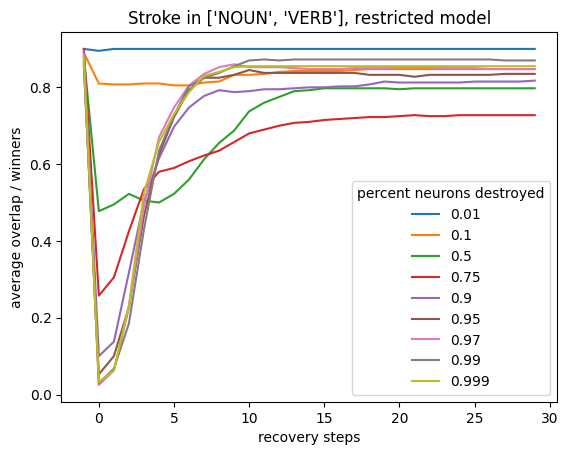

In [157]:
scaled_xvals = [i-1 for i in range(len(total_vals_pre_stroke_overlaps[0]))]
for i in range(len(total_vals_pre_stroke_overlaps)):
  plt.plot(scaled_xvals , total_vals_pre_stroke_overlaps[i], label=f"{stroke_severities[i]}")
  plt.title(f"Stroke in {areas}, restricted model")
  plt.ylabel("average overlap / winners")
  plt.xlabel("recovery steps")
plt.legend(title="percent neurons destroyed")
plt.show()

In [33]:
brain3.test_noun("flap")

NameError: name 'from_area' is not defined

In [84]:
from learner_more_words import LearnBrain
import numpy as np
# Word/part-of-speech acquisition experiments
def stroke_diff_severities_many_words(areas, num_nouns, num_verbs, stroke_severities, plasticity, simple_train_steps, recovery_steps, pre_stroke_percentage, have_stroke=False):
  total_sv_vals = []
  for severity in stroke_severities:
    brain = LearnBrain(plasticity, LEX_k=100, num_nouns=num_nouns, num_verbs=num_verbs)
    total_results = []
    if have_stroke:
      brain.stroke(percent_neurons_destroyed=pre_stroke_percentage, areas=areas)
    print("training")
    brain.train(simple_train_steps)
    running = []
    nouns = ["DOG", "CAT", "TREE", "PENCIL", "SCISSORS", "COMB", "FLOWER", "TOOTHBRUSH", "BROOM", "MUSHROOM",  "CAMEL", "BENCH", "SNAIL", "DART", "GLOBE", "WREATH", "BEAVER", "ACORN", "STILTS", "DOMINOES", "CACTUS", "HARP",  "KNOCKER", "STETHOSCOPE", "UNICORN", "FUNNEL", "COMPASS", "TRIPOD",  "SCROLL", "TRELLIS", "PALETTE", "ABACUS", "JUMP", "RUN"]
    # for noun_idx in range(len(nouns)):
    for noun_idx in range(num_nouns + num_verbs):
      out = brain.testIndexedWord(noun_idx, min_overlap=0.1)
      out = out if out else -1
      if out == noun_idx:
        running.append(1)
      else:
        running.append(0)

    total_results.append(np.mean(running))

    brain.stroke(percent_neurons_destroyed=severity, areas=areas)

    for _ in range(recovery_steps):
      brain.train(1)
      running = []
      for noun_idx in range(num_nouns + num_verbs):
        out = brain.testIndexedWord(noun_idx, min_overlap=0.1)
        out = out if out else -1
        if out == noun_idx:
          running.append(1)
        else:
          running.append(0)
      total_results.append(np.mean(running))
    total_sv_vals.append(total_results)
  return total_sv_vals
  

In [98]:
import matplotlib.pyplot as plt 
areas = ["NOUN", "VERB"]
stroke_severities = [0.1, 0.2, 0.3, 0.4, 0.5]
plasticity = 0.05 
simple_train_steps = 30
recovery_steps = 15
pre_stroke_percentage = 0.98
num_nouns = 4
num_verbs = 4
total_get_healed_vals = stroke_diff_severities_many_words(areas, num_nouns, num_verbs, stroke_severities, plasticity, simple_train_steps, recovery_steps, pre_stroke_percentage, have_stroke=False)
print(total_get_healed_vals)
scaled_xvals = [i-1 for i in range(len(total_get_healed_vals[0]))]
for i in range(len(total_get_healed_vals)):
  plt.plot(scaled_xvals , total_get_healed_vals[i], label=f"{stroke_severities[i]}")
  plt.title(f"Stroke in {areas}")
  plt.ylabel("average overlap / winners")
  plt.xlabel("recovery steps")
plt.legend(title="percent neurons destroyed")
plt.show()

training
Round 0
Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
Round 8
Round 9
Round 10
Round 11
Round 12


KeyboardInterrupt: 

In [100]:
from learner import LearnBrain
import numpy as np
# Word/part-of-speech acquisition experiments
def test_nouns(areas, stroke_severities, plasticity, simple_train_steps, recovery_steps, pre_stroke_percentage, have_stroke=False):
  total_sv_vals = []
  for severity in stroke_severities:
    brain = LearnBrain(plasticity, LEX_k=100)
    total_results = []
    if have_stroke:
      brain.stroke(percent_neurons_destroyed=pre_stroke_percentage, areas=areas)
    print("training")
    brain.train(simple_train_steps)
    running = []
    nouns = ["DOG", "CAT"]
    verbs = ["JUMP", "RUN"]
    # for noun_idx in range(len(nouns)):
    for noun in nouns:
      out = brain.test_noun(noun, min_overlap=0.1)
      print(out)
      out = out if out else ''
      if out == noun:
        running.append(1)
      else:
        running.append(0)
    for verb in verbs:
      
      out = brain.test_verb(verb, min_overlap=0.1)
      print(out)

      out = out if out else ''
      if out == verb:
        running.append(1)
      else:
        running.append(0)

    total_results.append(np.mean(running))

    brain.stroke(percent_neurons_destroyed=severity, areas=areas)

    for _ in range(recovery_steps):
      brain.train(1)
      running = []
      for noun in nouns:
        out = brain.test_noun(noun, min_overlap=0.1)
        print(out)
        out = out if out else ''
        if out == noun:
          running.append(1)
        else:
          running.append(0)
      for verb in verbs:
        out = brain.test_verb(verb, min_overlap=0.1)
        print(out)
        out = out if out else ''
        if out == verb:
          running.append(1)
        else:
          running.append(0)
      total_results.append(np.mean(running))
    total_sv_vals.append(total_results)
  return total_sv_vals
  

training
Round 0
Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
Round 8
Round 9
Round 10
Round 11
Round 12
Round 13
Round 14
DOG
CAT
JUMP
RUN
Round 0
DOG
CAT
JUMP
RUN
Round 0
DOG
CAT
JUMP
RUN
Round 0
DOG
CAT
JUMP
RUN
Round 0
DOG
CAT
JUMP
RUN
Round 0
DOG
CAT
JUMP
RUN
Round 0
DOG
CAT
JUMP
RUN
Round 0
DOG
CAT
JUMP
RUN
Round 0
DOG
CAT
JUMP
RUN
Round 0
DOG
CAT
JUMP
RUN
Round 0
DOG
CAT
JUMP
RUN
Round 0
DOG
CAT
JUMP
RUN
Round 0
DOG
CAT
JUMP
RUN
Round 0
DOG
CAT
JUMP
RUN
Round 0
DOG
CAT
JUMP
RUN
Round 0
DOG
CAT
JUMP
RUN
training
Round 0
Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
Round 8
Round 9
Round 10
Round 11
Round 12
Round 13
Round 14
DOG
CAT
JUMP
RUN
Round 0
DOG
CAT
CAT
RUN
Round 0
DOG
CAT
CAT
RUN
Round 0
DOG
CAT
JUMP
RUN
Round 0
DOG
CAT
JUMP
RUN
Round 0
DOG
CAT
CAT
RUN
Round 0
DOG
CAT
CAT
RUN
Round 0
DOG
CAT
JUMP
RUN
Round 0
DOG
DOG
JUMP
RUN
Round 0
DOG
DOG
JUMP
RUN
Round 0
DOG
DOG
JUMP
RUN
Round 0
DOG
DOG
JUMP
RUN
Round 0
DOG
DOG
JUMP
RUN
Round 0
DOG
DOG
JUMP
RUN
Ro

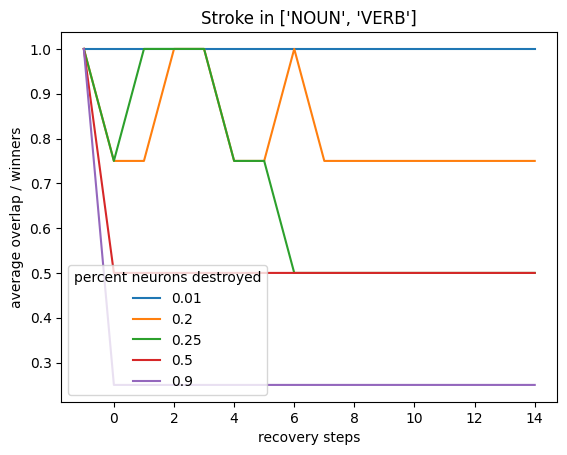

In [101]:
import matplotlib.pyplot as plt 
areas = ["NOUN", "VERB"]
stroke_severities = [0.01, 0.2, 0.25, 0.5, 0.9]
plasticity = 0.05 
simple_train_steps = 15
recovery_steps = 15
pre_stroke_percentage = 0.98
num_nouns = 2
num_verbs = 2
total_noun_scores = test_nouns(areas, stroke_severities, plasticity, simple_train_steps, recovery_steps, pre_stroke_percentage, have_stroke=False)
print(total_noun_scores)
scaled_xvals = [i-1 for i in range(len(total_noun_scores[0]))]
for i in range(len(total_noun_scores)):
  plt.plot(scaled_xvals , total_noun_scores[i], label=f"{stroke_severities[i]}")
  plt.title(f"Stroke in {areas}")
  plt.ylabel("average overlap / winners")
  plt.xlabel("recovery steps")
plt.legend(title="percent neurons destroyed")
plt.show()

In [81]:
import pickle as pkl 
with open("stroke_diff_severities_2_no_15_15.pkl", "wb") as f:
  pkl.dump(total_vals, f)

In [ ]:
import matplotlib.pyplot as plt 
areas = ["NOUN", "VERB", "MOTOR", "VISUAL"]
stroke_severities = [0.01, 0.5, 0.75]
plasticity = 0.05 
simple_train_steps = 30
recovery_steps = 40
pre_stroke_percentage = 0.98
num_nouns = 4
num_verbs = 4
total_please_work_vals = stroke_diff_severities_many_words(areas, num_nouns, num_verbs, stroke_severities, plasticity, simple_train_steps, recovery_steps, pre_stroke_percentage)
print(total_please_work_vals)
scaled_xvals = [i-1 for i in range(len(total_vals[0]))]
for i in range(len(total_vals)):
  plt.plot(scaled_xvals , total_vals[i], label=f"{stroke_severities[i]}")
  plt.title(f"Stroke in {areas}")
  plt.ylabel("average overlap / winners")
  plt.xlabel("recovery steps")
plt.legend(title="percent neurons destroyed")
plt.show()

In [120]:
from learner import LearnBrain
import numpy as np
# Word/part-of-speech acquisition experiments
def stroke_diff_severities_overlap_threshold(areas, stroke_severities, plasticity, simple_train_steps, recovery_steps, threshold, give_pre_stroke=False, pre_stroke_severity=0.9):
  total_sv_vals = []
  for severity in stroke_severities:
    words = [("CAT", "noun"), ("DOG", "noun"), ("JUMP", "verb"), ("RUN", "verb")]
    brain = LearnBrain(plasticity, LEX_k=100)
    total_results = []
    if give_pre_stroke:
      brain.stroke(pre_stroke_severity, areas=["PHON"])
    brain.train_simple(simple_train_steps)
    running = []
    for word in words:
      res = brain.test_word_nums_only(word[0])
      ratio = res[f"{word[1]}_overlap"] / len(res[f"{word[1]}_winners"])
      ratio = 0 if ratio < threshold else 1
      running.append(ratio)
    
    total_results.append(np.mean(running))

    brain.stroke(percent_neurons_destroyed=severity, areas=areas)

    for _ in range(recovery_steps):
      brain.train_simple(1)
      running = []
      for word in words:
        res = brain.test_word_nums_only(word[0])
        ratio = res[f"{word[1]}_overlap"] / len(res[f"{word[1]}_winners"])
        ratio = 0 if ratio < threshold else 1
        running.append(ratio)
      total_results.append(np.mean(running))
    print(total_results)
    total_sv_vals.append(total_results)
  return total_sv_vals
  

In [121]:
import matplotlib.pyplot as plt 
areas = ["NOUN", "VERB", "MOTOR", "VISUAL"]
# stroke_severities = [0.01, 0.1, 0.5, 0.75, 0.90, 0.95, 0.97, 0.99, 0.999]
stroke_severities = [0.1, 0.25, 0.5, 0.7, 0.9]
plasticity = 0.05 
simple_train_steps = 30
recovery_steps = 30
threshold = 0.75
total_vals_overlap_treshold = stroke_diff_severities_overlap_threshold(areas, stroke_severities, plasticity, simple_train_steps, recovery_steps, threshold)
scaled_xvals = [i-1 for i in range(len(total_vals_overlap_treshold[0]))]
for i in range(len(total_vals_overlap_treshold)):
  plt.plot(scaled_xvals , total_vals_overlap_treshold[i], label=f"{stroke_severities[i]}")
  plt.title(f"Stroke in {areas}")
  plt.ylabel("average overlap / winners")
  plt.xlabel("recovery steps")
plt.legend(title="percent neurons destroyed")
plt.show()

Round 0
Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
Round 8
Round 9
Round 10
Round 11
Round 12
Round 13
Round 14
Round 15
Round 16
Round 17
Round 18
Round 19
Round 20
Round 21
Round 22
Round 23
Round 24
Round 25
Round 26
Round 27
Round 28
Round 29
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0


KeyboardInterrupt: 

Round 0
Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
Round 8
Round 9
Round 10
Round 11
Round 12
Round 13
Round 14
Round 15
Round 16
Round 17
Round 18
Round 19
Round 20
Round 21
Round 22
Round 23
Round 24
Round 25
Round 26
Round 27
Round 28
Round 29
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
[np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.5), np.float64(0.5), np.float64(0.5), np.float64(0.75), np.float64(0.75), np.float64(0.75), np.float64(0.75), np.float64(0.75), np.float64(0.75), np.float64(0.75), np.float64(0.75), np.float64(0.75), np.float64(0.75), np.float64(0.75), np.float64(0.75), np.float64(0.75), np.float64

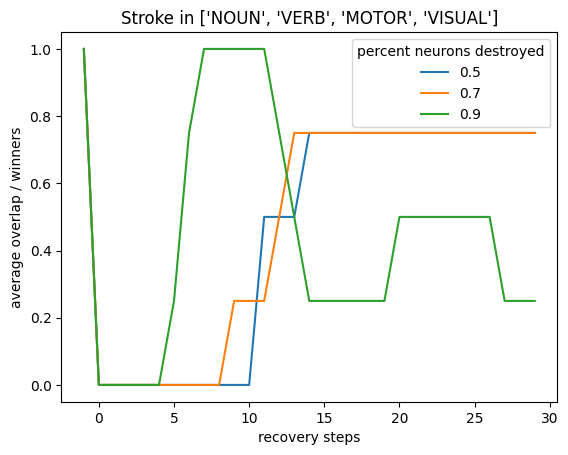

In [124]:
import matplotlib.pyplot as plt 
areas = ["NOUN", "VERB", "MOTOR", "VISUAL"]
# stroke_severities = [0.01, 0.1, 0.5, 0.75, 0.90, 0.95, 0.97, 0.99, 0.999]
stroke_severities = [0.1, 0.25, 0.5, 0.7, 0.9]
plasticity = 0.05 
simple_train_steps = 30
recovery_steps = 30
threshold = 0.75
total_vals_overlap_treshold_no_pre_stroke = stroke_diff_severities_overlap_threshold(areas, stroke_severities, plasticity, simple_train_steps, recovery_steps, threshold, give_pre_stroke=False, pre_stroke_severity=0.7)
scaled_xvals = [i-1 for i in range(len(total_vals_overlap_treshold[0]))]


In [ ]:
for i in range(len(total_vals_overlap_treshold)):
  plt.plot(scaled_xvals , total_vals_overlap_treshold[i], label=f"{stroke_severities[i]}")
  plt.title(f"Stroke in {areas}")
  plt.ylabel("average overlap / winners")
  plt.xlabel("recovery steps")
plt.legend(title="percent neurons destroyed")
plt.show()

In [134]:
from learner import LearnBrain
import numpy as np
# Word/part-of-speech acquisition experiments
def stroke_diff_severities_overlap_threshold_better_than_opp(areas, stroke_severities, plasticity, simple_train_steps, recovery_steps, threshold, give_pre_stroke=False, pre_stroke_severity=0.9):
  total_sv_vals = []
  for severity in stroke_severities:
    words = [("CAT", "noun"), ("DOG", "noun"), ("JUMP", "verb"), ("RUN", "verb")]
    brain = LearnBrain(plasticity, LEX_k=100)
    total_results = []
    if give_pre_stroke:
      brain.stroke(pre_stroke_severity, areas=["PHON"])
    brain.train_simple(simple_train_steps)
    running = []
    for word in words:
      res = brain.test_word_nums_only(word[0])
      ratio = res[f"{word[1]}_overlap"] / len(res[f"{word[1]}_winners"])
      opp_val = "noun" if word[1] == "verb" else "verb"
      opp_ratio = res[f"{opp_val}_overlap"] / len(res[f"{opp_val}_winners"])
      if ratio > threshold and ratio > opp_ratio:
        ratio = 1
      else:
        ratio = 0
      running.append(ratio)
    
    total_results.append(np.mean(running))

    brain.stroke(percent_neurons_destroyed=severity, areas=areas)

    for _ in range(recovery_steps):
      brain.train_simple(1)
      running = []
      for word in words:
        res = brain.test_word_nums_only(word[0])
        ratio = res[f"{word[1]}_overlap"] / len(res[f"{word[1]}_winners"])
        opp_val = "noun" if word[1] == "verb" else "verb"
        opp_ratio = res[f"{opp_val}_overlap"] / len(res[f"{opp_val}_winners"])
        if ratio > threshold and ratio > opp_ratio:
          ratio = 1
        else:
          ratio = 0
        running.append(ratio)
      total_results.append(np.mean(running))
    print(total_results)
    total_sv_vals.append(total_results)
  return total_sv_vals
  

In [135]:
import matplotlib.pyplot as plt 
areas = ["NOUN", "VERB"]
# stroke_severities = [0.01, 0.1, 0.5, 0.75, 0.90, 0.95, 0.97, 0.99, 0.999]
stroke_severities = [0.1, 0.25, 0.5, 0.7, 0.9]
plasticity = 0.05 
simple_train_steps = 30
recovery_steps = 30
threshold = 0.75
total_vals_overlap_treshold = stroke_diff_severities_overlap_threshold_better_than_opp(areas, stroke_severities, plasticity, simple_train_steps, recovery_steps, threshold, give_pre_stroke=True, pre_stroke_severity=0.7)

Round 0
Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
Round 8
Round 9
Round 10
Round 11
Round 12
Round 13
Round 14
Round 15
Round 16
Round 17
Round 18
Round 19
Round 20
Round 21
Round 22
Round 23
Round 24
Round 25
Round 26
Round 27
Round 28
Round 29
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
[np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(0.75), np.float64(0.75), np.float64(0.75), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.

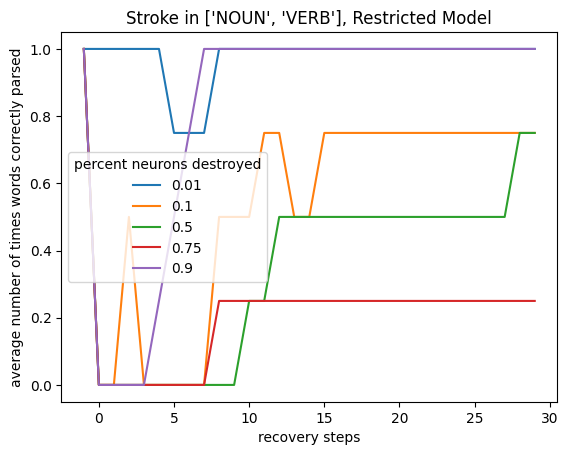

<Figure size 4000x1200 with 0 Axes>

In [153]:
scaled_xvals = [i-1 for i in range(len(total_vals_overlap_treshold[0]))]
for i in range(len(total_vals_overlap_treshold)):
  plt.plot(scaled_xvals , total_vals_overlap_treshold[i], label=f"{stroke_severities[i]}")
  plt.title(f"Stroke in {areas}, Restricted Model")
  plt.ylabel("average number of times words correctly parsed")
  plt.xlabel("recovery steps")
plt.legend(title="percent neurons destroyed")
plt.figure(figsize=(40,12))
plt.show()

In [139]:
import matplotlib.pyplot as plt 
areas = ["NOUN", "VERB"]
# stroke_severities = [0.01, 0.1, 0.5, 0.75, 0.90, 0.95, 0.97, 0.99, 0.999]
stroke_severities = [0.1, 0.25, 0.5, 0.7, 0.9]
plasticity = 0.05 
simple_train_steps = 30
recovery_steps = 30
threshold = 0.75
total_vals_overlap_treshold_no_pre_stroke = stroke_diff_severities_overlap_threshold_better_than_opp(areas, stroke_severities, plasticity, simple_train_steps, recovery_steps, threshold, give_pre_stroke=False, pre_stroke_severity=0.7)

Round 0
Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
Round 8
Round 9
Round 10
Round 11
Round 12
Round 13
Round 14
Round 15
Round 16
Round 17
Round 18
Round 19
Round 20
Round 21
Round 22
Round 23
Round 24
Round 25
Round 26
Round 27
Round 28
Round 29
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
[np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.flo

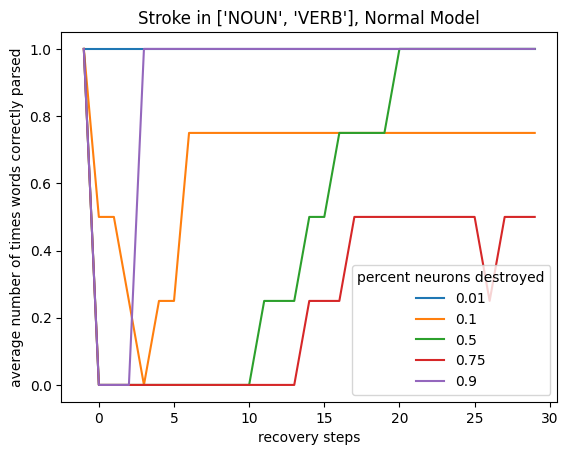

<Figure size 4000x1200 with 0 Axes>

In [154]:
scaled_xvals = [i-1 for i in range(len(total_vals_overlap_treshold_no_pre_stroke[0]))]
for i in range(len(total_vals_overlap_treshold_no_pre_stroke)):
  plt.plot(scaled_xvals , total_vals_overlap_treshold_no_pre_stroke[i], label=f"{stroke_severities[i]}")
  plt.title(f"Stroke in {areas}, Normal Model")
  plt.ylabel("average number of times words correctly parsed")
  plt.xlabel("recovery steps")
plt.legend(title="percent neurons destroyed")
plt.figure(figsize=(40,12))
plt.show()

In [127]:
from learner import LearnBrain
import numpy as np
# Word/part-of-speech acquisition experiments
def stroke_decay(areas, stroke_severities, plasticity, simple_train_steps, give_pre_stroke=False, pre_stroke_severity=0.9):
  total_sv_vals = []
  brain = LearnBrain(plasticity, LEX_k=100)
  brain.train_simple(simple_train_steps)
  if give_pre_stroke:
    brain.stroke(pre_stroke_severity, areas=["PHON"])
  for severity in stroke_severities:
    brain.stroke(percent_neurons_destroyed=severity, areas=areas)
    words = [("CAT", "noun"), ("DOG", "noun"), ("JUMP", "verb"), ("RUN", "verb")]
    running = []
    for word in words:
      res = brain.test_word_nums_only(word[0])
      ratio = res[f"{word[1]}_overlap"] / len(res[f"{word[1]}_winners"])
      # opp_val = "noun" if word[1] == "verb" else "verb"
      # opp_ratio = res[f"{opp_val}_overlap"] / len(res[f"{opp_val}_winners"])
      # if ratio > threshold and ratio > opp_ratio:
        # ratio = 1
      # else:
        # ratio = 0
      running.append(ratio)
    total_sv_vals.append(np.mean(running))
    # for _ in range(recovery_steps):
    #   brain.train_simple(1)
    #   running = []
    #   for word in words:
    #     res = brain.test_word_nums_only(word[0])
    #     ratio = res[f"{word[1]}_overlap"] / len(res[f"{word[1]}_winners"])
    #     ratio = 0 if ratio < threshold else 1
    #     running.append(ratio)
    #   total_results.append(np.mean(running))
    # print(total_results)
  return total_sv_vals
  

In [144]:
import matplotlib.pyplot as plt 
areas = ["NOUN", "VERB"]
# stroke_severities = [0.01, 0.1, 0.5, 0.75, 0.90, 0.95, 0.97, 0.99, 0.999]
stroke_severities = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
plasticity = 0.05 
simple_train_steps = 30
recovery_steps = 30
total_vals_decay = stroke_decay(areas, stroke_severities, plasticity, simple_train_steps, give_pre_stroke=False, pre_stroke_severity=0.9)

Round 0
Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
Round 8
Round 9
Round 10
Round 11
Round 12
Round 13
Round 14
Round 15
Round 16
Round 17
Round 18
Round 19
Round 20
Round 21
Round 22
Round 23
Round 24
Round 25
Round 26
Round 27
Round 28
Round 29


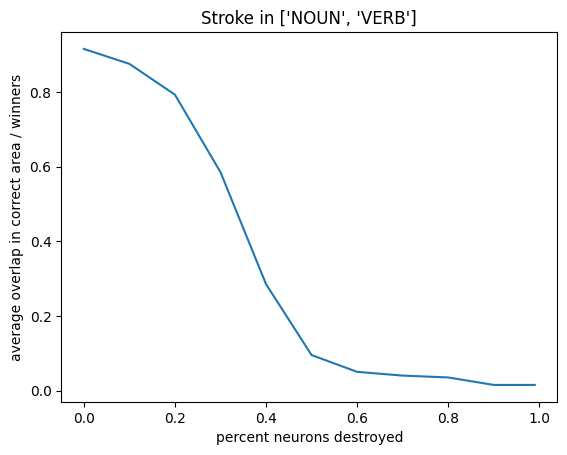

In [131]:
plt.plot(stroke_severities , total_vals_decay)
plt.title(f"Stroke in {areas}")
plt.ylabel("average overlap in correct area / winners")
plt.xlabel("percent neurons destroyed")
plt.show()

In [159]:
from learner import LearnBrain
import numpy as np
# Word/part-of-speech acquisition experiments
def normal_learning():
  total_vals = []
  words = [("CAT", "noun"), ("DOG", "noun"), ("JUMP", "verb"), ("RUN", "verb")]
  brain = LearnBrain(plasticity, LEX_k=100)
  total_results = []
  running = []
  for word in words:
    res = brain.test_word_nums_only(word[0])
    running.append(res[f"{word[1]}_overlap"] / len(res[f"{word[1]}_winners"]))
  
  total_results.append(np.mean(running))

  for _ in range(30):
    brain.train_simple(1)
    running = []
    for word in words:
      res = brain.test_word_nums_only(word[0])
      running.append(res[f"{word[1]}_overlap"] / len(res[f"{word[1]}_winners"]))
    total_results.append(np.mean(running))
  total_vals.append(total_results)
  return total_vals

normal_curve = normal_learning()

Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0


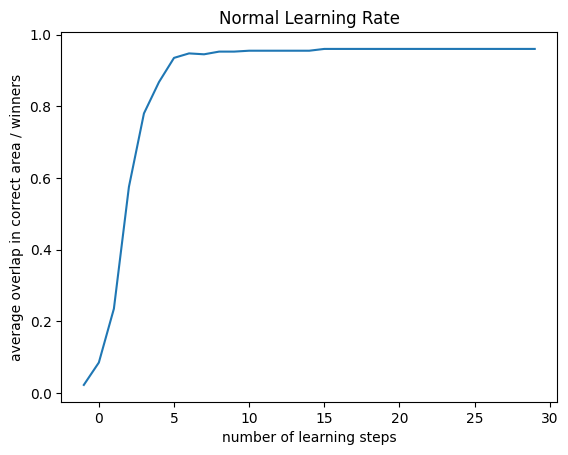

In [164]:
steps = [i -1 for i in range(31)]
plt.plot(steps , normal_curve[0])
plt.title(f"Normal Learning Rate")
plt.ylabel("average overlap in correct area / winners")
plt.xlabel("number of learning steps")
plt.show()

In [166]:
from learner import LearnBrain
import numpy as np
# Word/part-of-speech acquisition experiments
def normal_learning_restricted():
  total_vals = []
  words = [("CAT", "noun"), ("DOG", "noun"), ("JUMP", "verb"), ("RUN", "verb")]
  brain = LearnBrain(plasticity, LEX_k=100)
  brain.stroke(0.7, areas=["PHON"])
  total_results = []
  running = []
  for word in words:
    res = brain.test_word_nums_only(word[0])
    running.append(res[f"{word[1]}_overlap"] / len(res[f"{word[1]}_winners"]))
  
  total_results.append(np.mean(running))

  for _ in range(30):
    brain.train_simple(1)
    running = []
    for word in words:
      res = brain.test_word_nums_only(word[0])
      running.append(res[f"{word[1]}_overlap"] / len(res[f"{word[1]}_winners"]))
    total_results.append(np.mean(running))
  total_vals.append(total_results)
  return total_vals

normal_curve_restricted = normal_learning_restricted()

Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0


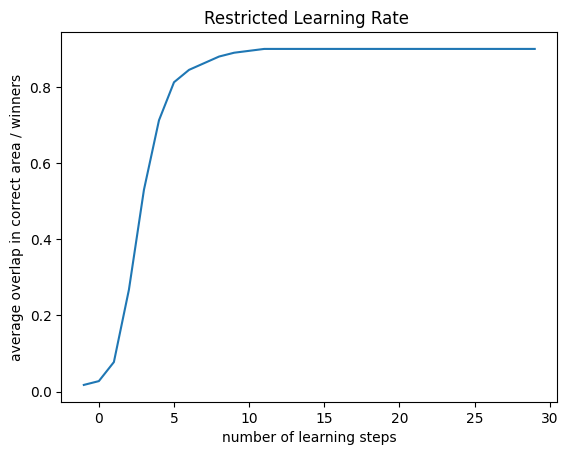

In [171]:
steps = [i -1 for i in range(31)]
plt.plot(steps , normal_curve_restricted[0])
plt.title(f"Restricted Learning Rate ")
plt.ylabel("average overlap in correct area / winners")
plt.xlabel("number of learning steps")
plt.show()

In [168]:
from learner import LearnBrain
import numpy as np
# Word/part-of-speech acquisition experiments
def normal_learning_threshold():
  total_vals = []
  words = [("CAT", "noun"), ("DOG", "noun"), ("JUMP", "verb"), ("RUN", "verb")]
  brain = LearnBrain(plasticity, LEX_k=100)
  total_results = []
  running = []
  for word in words:
    res = brain.test_word_nums_only(word[0])
    ratio = res[f"{word[1]}_overlap"] / len(res[f"{word[1]}_winners"])
    opp_val = "noun" if word[1] == "verb" else "verb"
    opp_ratio = res[f"{opp_val}_overlap"] / len(res[f"{opp_val}_winners"])
    if ratio > threshold and ratio > opp_ratio:
      ratio = 1
    else:
      ratio = 0
    running.append(ratio)
  
  total_results.append(np.mean(running))

  for _ in range(recovery_steps):
    brain.train_simple(1)
    running = []
    for word in words:
      res = brain.test_word_nums_only(word[0])
      ratio = res[f"{word[1]}_overlap"] / len(res[f"{word[1]}_winners"])
      opp_val = "noun" if word[1] == "verb" else "verb"
      opp_ratio = res[f"{opp_val}_overlap"] / len(res[f"{opp_val}_winners"])
      if ratio > threshold and ratio > opp_ratio:
        ratio = 1
      else:
        ratio = 0
      running.append(ratio)
    total_results.append(np.mean(running))
  print(total_results)
  total_vals.append(total_results)
  return total_vals
normal_learning_threshold_vals = normal_learning_threshold()

Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.75), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0)]


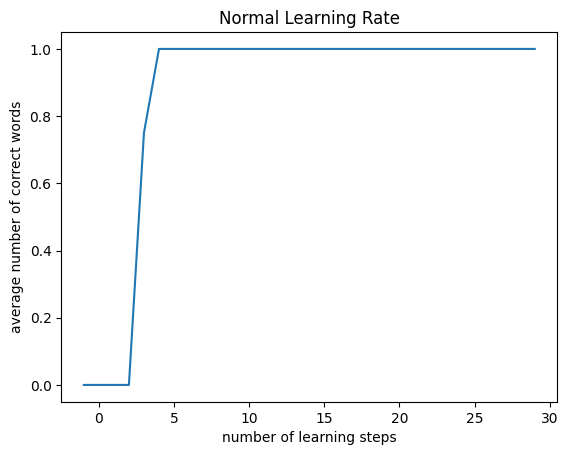

In [169]:
steps = [i -1 for i in range(31)]
plt.plot(steps , normal_learning_threshold_vals[0])
plt.title(f"Normal Learning Rate")
plt.ylabel("average number of correct words")
plt.xlabel("number of learning steps")
plt.show()

In [170]:
from learner import LearnBrain
import numpy as np
# Word/part-of-speech acquisition experiments
def normal_learning_threshold_restricted():
  total_vals = []
  words = [("CAT", "noun"), ("DOG", "noun"), ("JUMP", "verb"), ("RUN", "verb")]
  brain = LearnBrain(plasticity, LEX_k=100)
  brain.stroke(0.7, areas=["PHON"])
  total_results = []
  running = []
  for word in words:
    res = brain.test_word_nums_only(word[0])
    ratio = res[f"{word[1]}_overlap"] / len(res[f"{word[1]}_winners"])
    opp_val = "noun" if word[1] == "verb" else "verb"
    opp_ratio = res[f"{opp_val}_overlap"] / len(res[f"{opp_val}_winners"])
    if ratio > threshold and ratio > opp_ratio:
      ratio = 1
    else:
      ratio = 0
    running.append(ratio)
  
  total_results.append(np.mean(running))

  for _ in range(recovery_steps):
    brain.train_simple(1)
    running = []
    for word in words:
      res = brain.test_word_nums_only(word[0])
      ratio = res[f"{word[1]}_overlap"] / len(res[f"{word[1]}_winners"])
      opp_val = "noun" if word[1] == "verb" else "verb"
      opp_ratio = res[f"{opp_val}_overlap"] / len(res[f"{opp_val}_winners"])
      if ratio > threshold and ratio > opp_ratio:
        ratio = 1
      else:
        ratio = 0
      running.append(ratio)
    total_results.append(np.mean(running))
  print(total_results)
  total_vals.append(total_results)
  return total_vals
normal_learning_rate_threshold_restricted = normal_learning_threshold_restricted()

Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.25), np.float64(0.75), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0)]


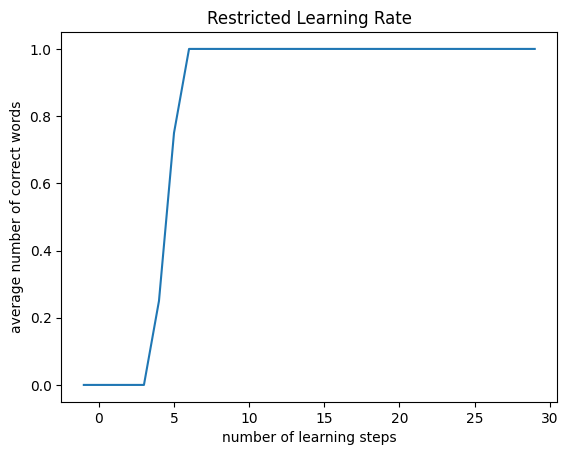

In [173]:
steps = [i -1 for i in range(31)]
plt.plot(steps , normal_learning_rate_threshold_restricted[0])
plt.title(f"Restricted Learning Rate")
plt.ylabel("average number of correct words")
plt.xlabel("number of learning steps")
plt.show()